Assignement 2 
Author: RavindraSadaphule

Import Packages for Demonstrations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [2]:
 # change color channels order for matplotlib     
def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    plt.show()

The next steps illustrate converting an image to gray scale

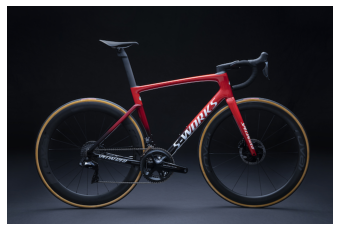

In [3]:
img = cv2.imread('Bikeshot4.png')
plot_cv_img(img)

In [4]:
img = cv2.imread('Bikeshot4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

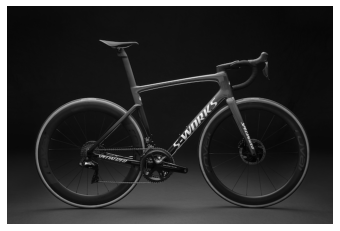

In [5]:
plot_cv_img(gray)

The next section addresses filtering.


In [6]:
#Lets generate noise with Open CV
# initialize noise image with zeros
noise = np.zeros((427,640))

# fill the image with random numbers in given range
cv2.randu(noise, 0, 256)

array([[135.75239509,  51.0103553 , 102.67121742, ..., 110.68727376,
         48.2704603 , 252.32547156],
       [163.33586475, 149.59426034, 250.19701636, ..., 127.50579645,
         88.24187922, 139.32975232],
       [126.83790237, 251.64374035, 244.84811041, ..., 111.91946425,
         75.28380811, 139.9288656 ],
       ...,
       [249.88005756,  25.31571439, 204.15480426, ..., 168.14976499,
        227.84024573, 120.18024727],
       [249.87191647, 121.81933668, 184.59591341, ...,  23.97328949,
          8.08539191,  27.65462855],
       [224.68134663,  59.8220798 , 135.44393717, ...,  22.76294729,
         52.04583613, 146.91161392]])

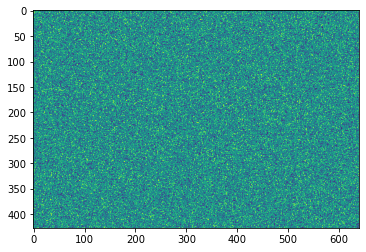

In [7]:
plt.imshow(noise)

In [8]:
noisy_gray = gray + np.array(0.2*noise, dtype=np.int)

/var/folders/zp/d7wsw3vn24vbw3tr9j539kjh0000gn/T/ipykernel_19105/3121543527.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_gray = gray + np.array(0.2*noise, dtype=np.int)


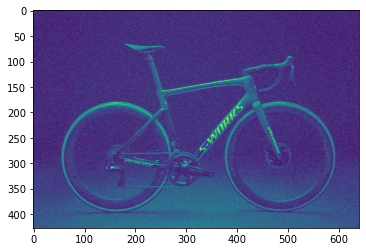

In [9]:
plt.imshow(noisy_gray)

Linear Filter Example

/var/folders/zp/d7wsw3vn24vbw3tr9j539kjh0000gn/T/ipykernel_19105/866093394.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.asarray(img, dtype=np.float)
/var/folders/zp/d7wsw3vn24vbw3tr9j539kjh0000gn/T/ipykernel_19105/866093394.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidan

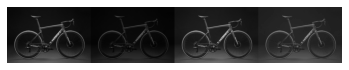

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

def point_operation(img, K, L):
    """
    Applies point operation to given grayscale image
    """
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    # clip pixel values
    img[img > 255] = 255 
    img[img < 0] = 0
    return np.asarray(img, dtype = np.int)

def main():
    # read an image 
    img = cv2.imread('Bikeshot4.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # k = 0.5, l = 0
    out1 = point_operation(gray, 0.5, 0)

    # k = 1., l = 10
    out2 = point_operation(gray, 1., 10)

    # k = 0.8, l = 15
    out3 = point_operation(gray, 0.7, 25)
    
    res = np.hstack([gray,out1, out2, out3])
    plt.imshow(res, cmap='gray')
    plt.axis('off')

    plt.show()


if __name__ == '__main__':
    main()

Example of Image Rezing

In [11]:
# Source Image Size
img = cv2.imread('BikeShot3.jpg')
dimensions = img.shape
 
    # height, width, number of channels in image

height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
print(height, width, channels)

640 920 3


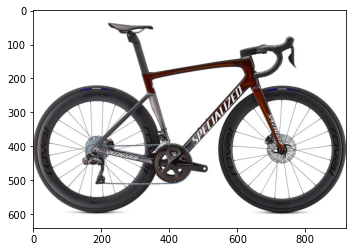

In [12]:
plt.imshow(img)

In [13]:
# Resizing of Image
# dsize
src=img
dsize = (425, 425)

# resize image
output = cv2.resize(src, dsize, interpolation = cv2.INTER_AREA)
height = output.shape[0]
width = output.shape[1]
print(height, width)

425 425


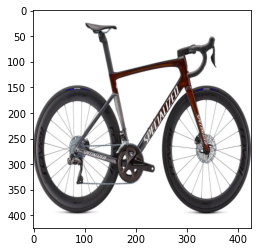

In [14]:
plt.imshow(output)

In [15]:
def normalize_image(image):
    """
    Normalize an image using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
    """
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (image - mean) / std

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


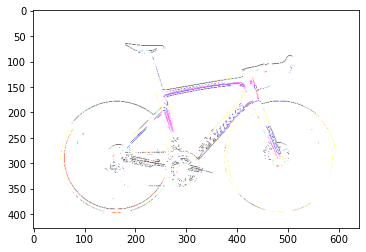

In [16]:
img = cv2.imread('BikeShot4.png')
normalized_image = normalize_image(img)
plt.imshow(normalized_image)